In [19]:
import pandas as pd
import numpy as np

# plots
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

### CATBOOST

In [20]:
df_train = pd.read_csv('../data/train_con_features_encoded.csv', index_col='Unnamed: 0')
df_test = pd.read_csv('../data/test_con_features_encoded.csv', index_col='Unnamed: 0')
display(df_train.head())

,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,...,cantidad_palabras_descripcion,relacion_palabras_descripcion,es_avenida,es_ciudad_capital,ciudad_turistica_top15,anio,mes,tipodepropiedad_count,ciudad_count,provincia_count
0,254099,8.116114,2.0,1.0,2.0,80.0,80.0,23533.0,NaN,NaN,...,0,0.000000,1,0,0,2015,8,57341,11014,58790
1,53461,10.000000,3.0,2.0,2.0,268.0,180.0,24514.0,19.310205,-99.227655,...,1,0.007968,1,0,0,2013,6,19297,1905,58790
2,247984,5.000000,3.0,2.0,2.0,144.0,166.0,48551.0,NaN,NaN,...,10,0.046957,0,0,0,2015,10,141717,793,21238
3,209067,1.000000,2.0,1.0,1.0,63.0,67.0,53666.0,19.301890,-99.688015,...,0,0.000000,0,0,0,2012,3,141717,154,41607
4,185997,10.000000,2.0,1.0,1.0,95.0,95.0,47835.0,NaN,NaN,...,1,0.074108,0,0,0,2016,6,57341,10360,21238


In [21]:
#Guardo y remuevo la columna id de los datos
id_col = df_test['id']
df_train = df_train.drop(['id'], axis=1)
df_test = df_test.drop(['id'], axis=1)

#Separo features de entrenamiento del precio
feature_cols = df_train.columns.tolist()
feature_cols.remove('precio')


X = df_train[feature_cols]
y = df_train['precio']

feature_cols

['antiguedad',
 'habitaciones',
 'garages',
 'banos',
 'metroscubiertos',
 'metrostotales',
 'idzona',
 'lat',
 'lng',
 'gimnasio',
 'usosmultiples',
 'piscina',
 'escuelascercanas',
 'centroscomercialescercanos',
 'cantidad_amenities',
 'cantidad_servicios',
 'relacion_metros',
 'metros_por_habitacion',
 'metros_por_bano',
 'metros_por_amenities',
 'bano_por_habitacion',
 'garages_por_habitacion',
 'precio_prom_ciudad',
 'precio_prom_propiedad',
 'provincia_top5',
 'seguridad_descripcion',
 'moderno_descripcion',
 'hermoso_descripcion',
 'estado_descripcion',
 'seguridad_titulo',
 'moderno_titulo',
 'hermoso_titulo',
 'estado_titulo',
 'cantidad_palabras_descripcion',
 'relacion_palabras_descripcion',
 'es_avenida',
 'es_ciudad_capital',
 'ciudad_turistica_top15',
 'anio',
 'mes',
 'tipodepropiedad_count',
 'ciudad_count',
 'provincia_count']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(180000, 43) (180000,)
(60000, 43) (60000,)


In [23]:
from catboost import CatBoostRegressor

'''CatBoost = CatBoostRegressor(loss_function='MAE')

params = {'depth':[10,15],
          'iterations':[1000],
          'learning_rate':[0.05,0.1,0.12], 
          'l2_leaf_reg':[10, 15],
         }
#border_count
#ctr_border_count
grid_search_result = CatBoost.grid_search(params, X=X_train, y=y_train, plot=True)'''

"CatBoost = CatBoostRegressor(loss_function='MAE')\n\nparams = {'depth':[10,15],\n          'iterations':[1000],\n          'learning_rate':[0.05,0.1,0.12], \n          'l2_leaf_reg':[10, 15],\n         }\n#border_count\n#ctr_border_count\ngrid_search_result = CatBoost.grid_search(params, X=X_train, y=y_train, plot=True)"

In [24]:
iterations = 1000        #best=1000    MAE=551393 CATBOOST ENC(ciudades) + ONE HOT ENC ---> k=50 
depth = 10               #best=10      MAE=550847 COUNT ENCODED ---> k=50
l2_leaf_reg = 6          #best=6
learning_rate = 0.07     #best=0.07
border_count = 128       #best=128
subsample = 0.9          #best=0.9
colsample_bylevel = 0.9  #best=0.9


In [25]:
CatBoost = CatBoostRegressor(iterations=iterations, loss_function='MAE', depth=depth, l2_leaf_reg=l2_leaf_reg,
                    learning_rate=learning_rate, border_count=border_count, subsample=subsample, colsample_bylevel=colsample_bylevel)
CatBoost_fit = CatBoost.fit(X_train, y_train)

0:	learn: 1444046.7145820	total: 126ms	remaining: 2m 5s
1:	learn: 1378340.9028971	total: 245ms	remaining: 2m 2s
2:	learn: 1320779.3611582	total: 371ms	remaining: 2m 3s
3:	learn: 1265466.6471604	total: 492ms	remaining: 2m 2s
4:	learn: 1214088.0713934	total: 619ms	remaining: 2m 3s
5:	learn: 1167948.6870452	total: 739ms	remaining: 2m 2s
6:	learn: 1127058.8491733	total: 870ms	remaining: 2m 3s
7:	learn: 1089139.1251671	total: 986ms	remaining: 2m 2s
8:	learn: 1055092.8254221	total: 1.12s	remaining: 2m 3s
9:	learn: 1023167.4445614	total: 1.24s	remaining: 2m 2s
10:	learn: 993367.5416863	total: 1.37s	remaining: 2m 3s
11:	learn: 967485.5318739	total: 1.49s	remaining: 2m 2s
12:	learn: 944051.3072064	total: 1.61s	remaining: 2m 2s
13:	learn: 922244.0453314	total: 1.73s	remaining: 2m 2s
14:	learn: 902156.2399175	total: 1.86s	remaining: 2m 2s
15:	learn: 883411.7397298	total: 1.98s	remaining: 2m 1s
16:	learn: 867520.1072867	total: 2.11s	remaining: 2m 2s
17:	learn: 852024.7627791	total: 2.25s	remaining

145:	learn: 596101.2211748	total: 18.4s	remaining: 1m 47s
146:	learn: 595323.8730774	total: 18.5s	remaining: 1m 47s
147:	learn: 594843.5997588	total: 18.6s	remaining: 1m 47s
148:	learn: 594019.7162964	total: 18.7s	remaining: 1m 46s
149:	learn: 593625.1224879	total: 18.8s	remaining: 1m 46s
150:	learn: 593229.5712928	total: 19s	remaining: 1m 46s
151:	learn: 592973.9049065	total: 19.1s	remaining: 1m 46s
152:	learn: 592687.0843901	total: 19.2s	remaining: 1m 46s
153:	learn: 592194.4404444	total: 19.3s	remaining: 1m 46s
154:	learn: 592106.3341041	total: 19.4s	remaining: 1m 46s
155:	learn: 591408.2996177	total: 19.6s	remaining: 1m 45s
156:	learn: 590772.8712750	total: 19.7s	remaining: 1m 45s
157:	learn: 589897.2705315	total: 19.8s	remaining: 1m 45s
158:	learn: 589542.3752784	total: 19.9s	remaining: 1m 45s
159:	learn: 589234.2525125	total: 20.1s	remaining: 1m 45s
160:	learn: 588837.9838257	total: 20.2s	remaining: 1m 45s
161:	learn: 588601.9384660	total: 20.3s	remaining: 1m 45s
162:	learn: 5884

287:	learn: 549281.4269463	total: 35.7s	remaining: 1m 28s
288:	learn: 548954.0454145	total: 35.8s	remaining: 1m 28s
289:	learn: 548820.4122913	total: 36s	remaining: 1m 28s
290:	learn: 548592.0146442	total: 36.1s	remaining: 1m 27s
291:	learn: 548402.2193272	total: 36.2s	remaining: 1m 27s
292:	learn: 548015.6598944	total: 36.3s	remaining: 1m 27s
293:	learn: 547878.1897846	total: 36.5s	remaining: 1m 27s
294:	learn: 547752.2496965	total: 36.6s	remaining: 1m 27s
295:	learn: 547397.9051517	total: 36.7s	remaining: 1m 27s
296:	learn: 547193.0934137	total: 36.8s	remaining: 1m 27s
297:	learn: 547105.5602309	total: 36.9s	remaining: 1m 27s
298:	learn: 546718.8754094	total: 37.1s	remaining: 1m 26s
299:	learn: 546440.8423334	total: 37.2s	remaining: 1m 26s
300:	learn: 546220.3782977	total: 37.3s	remaining: 1m 26s
301:	learn: 546067.5874139	total: 37.4s	remaining: 1m 26s
302:	learn: 545814.7329891	total: 37.5s	remaining: 1m 26s
303:	learn: 545649.5821238	total: 37.7s	remaining: 1m 26s
304:	learn: 5455

429:	learn: 523362.3006715	total: 53.1s	remaining: 1m 10s
430:	learn: 523145.1956679	total: 53.2s	remaining: 1m 10s
431:	learn: 522992.6527148	total: 53.3s	remaining: 1m 10s
432:	learn: 522769.6771343	total: 53.5s	remaining: 1m 10s
433:	learn: 522653.9411772	total: 53.6s	remaining: 1m 9s
434:	learn: 522588.6038266	total: 53.7s	remaining: 1m 9s
435:	learn: 522420.9131078	total: 53.8s	remaining: 1m 9s
436:	learn: 522317.4521465	total: 53.9s	remaining: 1m 9s
437:	learn: 522209.2086683	total: 54.1s	remaining: 1m 9s
438:	learn: 522106.2294195	total: 54.2s	remaining: 1m 9s
439:	learn: 521959.9490029	total: 54.3s	remaining: 1m 9s
440:	learn: 521801.9919421	total: 54.4s	remaining: 1m 8s
441:	learn: 521658.8858777	total: 54.6s	remaining: 1m 8s
442:	learn: 521531.5913850	total: 54.7s	remaining: 1m 8s
443:	learn: 521290.6355872	total: 54.8s	remaining: 1m 8s
444:	learn: 521129.7148125	total: 54.9s	remaining: 1m 8s
445:	learn: 520947.1663634	total: 55s	remaining: 1m 8s
446:	learn: 520779.9762742	to

574:	learn: 504056.5542169	total: 1m 12s	remaining: 53.5s
575:	learn: 503978.5942473	total: 1m 12s	remaining: 53.3s
576:	learn: 503871.8939955	total: 1m 12s	remaining: 53.2s
577:	learn: 503778.1125861	total: 1m 12s	remaining: 53.1s
578:	learn: 503728.0939012	total: 1m 12s	remaining: 53s
579:	learn: 503512.6559486	total: 1m 12s	remaining: 52.8s
580:	learn: 503437.9144321	total: 1m 13s	remaining: 52.7s
581:	learn: 503373.8554709	total: 1m 13s	remaining: 52.6s
582:	learn: 503322.3914916	total: 1m 13s	remaining: 52.4s
583:	learn: 503206.0378104	total: 1m 13s	remaining: 52.3s
584:	learn: 503153.1002981	total: 1m 13s	remaining: 52.2s
585:	learn: 503065.7069385	total: 1m 13s	remaining: 52.1s
586:	learn: 502894.7695501	total: 1m 13s	remaining: 51.9s
587:	learn: 502817.6400568	total: 1m 13s	remaining: 51.8s
588:	learn: 502745.1734993	total: 1m 14s	remaining: 51.7s
589:	learn: 502677.3004910	total: 1m 14s	remaining: 51.5s
590:	learn: 502537.1620764	total: 1m 14s	remaining: 51.4s
591:	learn: 5023

716:	learn: 488128.3093927	total: 1m 29s	remaining: 35.4s
717:	learn: 488035.7033659	total: 1m 29s	remaining: 35.3s
718:	learn: 487962.8823453	total: 1m 29s	remaining: 35.1s
719:	learn: 487839.6848413	total: 1m 30s	remaining: 35s
720:	learn: 487783.0335217	total: 1m 30s	remaining: 34.9s
721:	learn: 487685.7516090	total: 1m 30s	remaining: 34.8s
722:	learn: 487586.7282509	total: 1m 30s	remaining: 34.6s
723:	learn: 487472.1228161	total: 1m 30s	remaining: 34.5s
724:	learn: 487407.4865274	total: 1m 30s	remaining: 34.4s
725:	learn: 487318.0577556	total: 1m 30s	remaining: 34.3s
726:	learn: 487279.2216633	total: 1m 30s	remaining: 34.1s
727:	learn: 487155.8090497	total: 1m 31s	remaining: 34s
728:	learn: 487116.3418287	total: 1m 31s	remaining: 33.9s
729:	learn: 487024.4934908	total: 1m 31s	remaining: 33.8s
730:	learn: 486894.8752561	total: 1m 31s	remaining: 33.6s
731:	learn: 486788.6799889	total: 1m 31s	remaining: 33.5s
732:	learn: 486680.2060394	total: 1m 31s	remaining: 33.4s
733:	learn: 486596

859:	learn: 474972.9431741	total: 1m 48s	remaining: 17.7s
860:	learn: 474897.7985430	total: 1m 48s	remaining: 17.6s
861:	learn: 474802.5167122	total: 1m 49s	remaining: 17.4s
862:	learn: 474746.5943446	total: 1m 49s	remaining: 17.3s
863:	learn: 474681.4820305	total: 1m 49s	remaining: 17.2s
864:	learn: 474636.4106378	total: 1m 49s	remaining: 17.1s
865:	learn: 474578.9899021	total: 1m 49s	remaining: 16.9s
866:	learn: 474498.3213782	total: 1m 49s	remaining: 16.8s
867:	learn: 474460.0357535	total: 1m 49s	remaining: 16.7s
868:	learn: 474388.4913304	total: 1m 49s	remaining: 16.6s
869:	learn: 474284.8557549	total: 1m 50s	remaining: 16.4s
870:	learn: 474176.1569028	total: 1m 50s	remaining: 16.3s
871:	learn: 474099.6409356	total: 1m 50s	remaining: 16.2s
872:	learn: 474055.3700535	total: 1m 50s	remaining: 16.1s
873:	learn: 474004.7329963	total: 1m 50s	remaining: 15.9s
874:	learn: 473931.8633761	total: 1m 50s	remaining: 15.8s
875:	learn: 473876.2849171	total: 1m 50s	remaining: 15.7s
876:	learn: 47

In [26]:
CatBoost_pred = CatBoost_fit.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error

CatBoost_mae = mean_absolute_error(y_test, CatBoost_pred)
CatBoost_mae_train = mean_absolute_error(y_train, CatBoost_fit.predict(X_train))
print(f"MAE CATBoost (train): {CatBoost_mae_train:.5f}")
print(f"MAE CATBoost: {CatBoost_mae:.5f}")
print("------------------------------")

MAE CATBoost (train): 464318.34284
MAE CATBoost: 550847.62122
------------------------------


In [10]:
CatBoost_fit.feature_importances_

array([ 0.86189233,  4.38587806,  2.06615528,  3.19178926,  3.42701426,
       16.76239904,  8.16754234,  0.11259478,  0.1365017 ,  0.29342431,
        0.26326403,  0.35239793,  0.65713842,  0.34620527,  2.7151522 ,
        4.25996969,  2.26902448,  0.44865838,  2.71506848,  1.18710957,
        7.54727314,  3.40087096,  0.29930139,  0.25939302,  0.13546561,
        0.29765767,  0.25539588,  0.01854449,  0.02944561,  0.17055673,
        0.13780009,  0.31114684,  1.31537287,  0.12110056,  0.36371789,
        0.47072966,  5.38062361,  1.31317858,  4.99314735, 10.4500127 ,
        8.11008555])

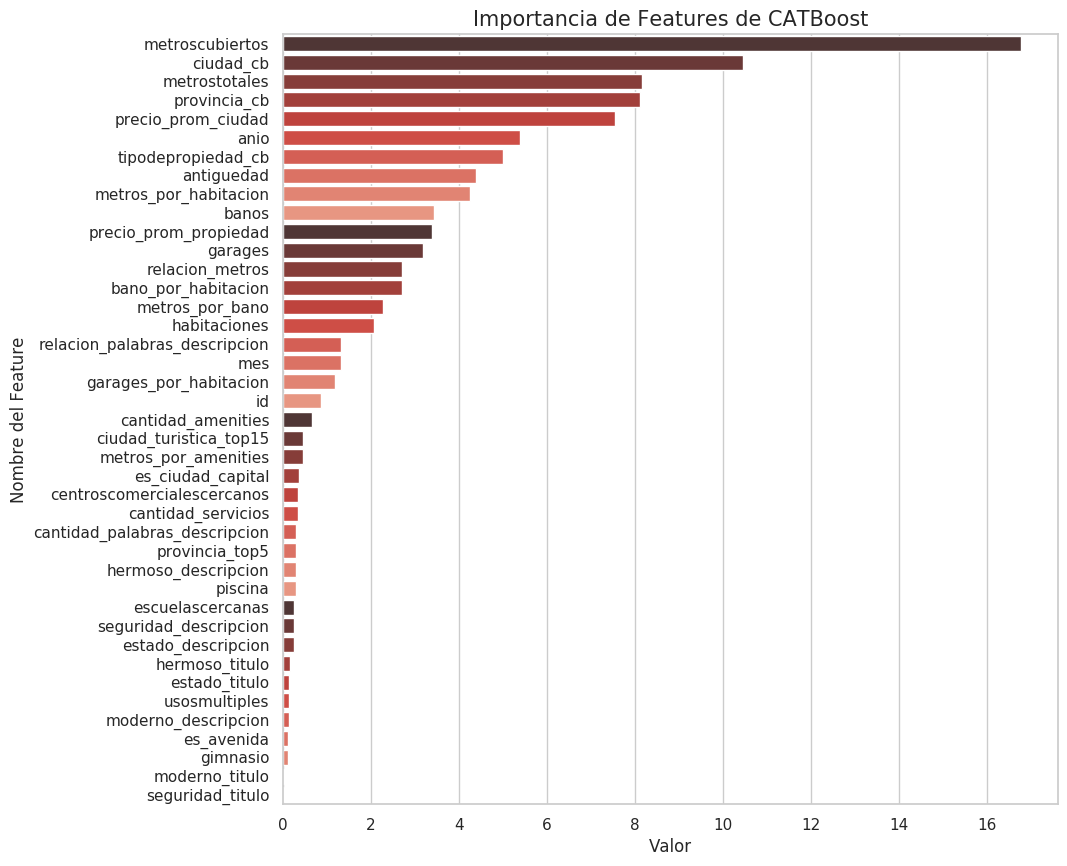

In [11]:
features = pd.DataFrame(index=feature_cols)
features['imp'] = CatBoost_fit.feature_importances_
features = features.sort_values(['imp'], ascending = False)
features

plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 10)
sns.set(style="whitegrid")

g = sns.barplot(y=features.index, x=features.imp, \
                palette=sns.color_palette("Reds_d", 10));

g.set_title('Importancia de Features de CATBoost', fontsize=15);
g.set_xlabel('Valor');
g.set_ylabel('Nombre del Feature');

In [12]:
CatBoost_pred_submit = CatBoost.fit(X, y).predict(df_test)

0:	learn: 1444590.0745150	total: 163ms	remaining: 2m 42s
1:	learn: 1379468.1620461	total: 309ms	remaining: 2m 34s
2:	learn: 1318674.3686635	total: 463ms	remaining: 2m 33s
3:	learn: 1261955.7120120	total: 613ms	remaining: 2m 32s
4:	learn: 1212624.4128111	total: 766ms	remaining: 2m 32s
5:	learn: 1167828.7889177	total: 913ms	remaining: 2m 31s
6:	learn: 1124757.2304597	total: 1.07s	remaining: 2m 31s
7:	learn: 1085129.2002815	total: 1.22s	remaining: 2m 30s
8:	learn: 1049581.5569607	total: 1.36s	remaining: 2m 30s
9:	learn: 1018407.4541828	total: 1.51s	remaining: 2m 29s
10:	learn: 990766.3780841	total: 1.67s	remaining: 2m 29s
11:	learn: 964416.0907577	total: 1.82s	remaining: 2m 29s
12:	learn: 942300.7390607	total: 1.98s	remaining: 2m 30s
13:	learn: 921326.6433446	total: 2.13s	remaining: 2m 30s
14:	learn: 901319.6341738	total: 2.28s	remaining: 2m 30s
15:	learn: 882895.0441588	total: 2.43s	remaining: 2m 29s
16:	learn: 865914.8703369	total: 2.59s	remaining: 2m 29s
17:	learn: 851233.6455199	total

145:	learn: 612767.8262396	total: 23.6s	remaining: 2m 18s
146:	learn: 612171.1943678	total: 23.8s	remaining: 2m 17s
147:	learn: 611884.3798376	total: 23.9s	remaining: 2m 17s
148:	learn: 611277.4085311	total: 24.1s	remaining: 2m 17s
149:	learn: 610696.6957311	total: 24.3s	remaining: 2m 17s
150:	learn: 610537.1070737	total: 24.4s	remaining: 2m 17s
151:	learn: 610305.9043096	total: 24.6s	remaining: 2m 17s
152:	learn: 610034.2897467	total: 24.7s	remaining: 2m 16s
153:	learn: 609412.5864976	total: 24.9s	remaining: 2m 16s
154:	learn: 609245.5631515	total: 25s	remaining: 2m 16s
155:	learn: 608933.2065299	total: 25.2s	remaining: 2m 16s
156:	learn: 608565.0591622	total: 25.4s	remaining: 2m 16s
157:	learn: 608255.7404790	total: 25.5s	remaining: 2m 15s
158:	learn: 607896.1245795	total: 25.7s	remaining: 2m 15s
159:	learn: 607271.1812747	total: 25.8s	remaining: 2m 15s
160:	learn: 607018.5044505	total: 26s	remaining: 2m 15s
161:	learn: 606661.1581211	total: 26.2s	remaining: 2m 15s
162:	learn: 606201

289:	learn: 572425.1970667	total: 46.8s	remaining: 1m 54s
290:	learn: 572135.1948932	total: 47s	remaining: 1m 54s
291:	learn: 571968.2578136	total: 47.1s	remaining: 1m 54s
292:	learn: 571777.5553984	total: 47.3s	remaining: 1m 54s
293:	learn: 571477.1367318	total: 47.4s	remaining: 1m 53s
294:	learn: 571353.2610710	total: 47.6s	remaining: 1m 53s
295:	learn: 571168.0539768	total: 47.8s	remaining: 1m 53s
296:	learn: 570976.9756135	total: 47.9s	remaining: 1m 53s
297:	learn: 570933.2975037	total: 48.1s	remaining: 1m 53s
298:	learn: 570875.8191733	total: 48.2s	remaining: 1m 53s
299:	learn: 570831.8544951	total: 48.4s	remaining: 1m 52s
300:	learn: 570632.7089759	total: 48.5s	remaining: 1m 52s
301:	learn: 570286.2546388	total: 48.7s	remaining: 1m 52s
302:	learn: 570224.8117029	total: 48.8s	remaining: 1m 52s
303:	learn: 570047.8797136	total: 49s	remaining: 1m 52s
304:	learn: 569895.9615017	total: 49.1s	remaining: 1m 51s
305:	learn: 569672.0783216	total: 49.3s	remaining: 1m 51s
306:	learn: 569609

431:	learn: 551446.8712996	total: 1m 8s	remaining: 1m 30s
432:	learn: 551347.6999028	total: 1m 8s	remaining: 1m 30s
433:	learn: 551228.3038810	total: 1m 9s	remaining: 1m 30s
434:	learn: 551053.5244139	total: 1m 9s	remaining: 1m 29s
435:	learn: 550965.9158825	total: 1m 9s	remaining: 1m 29s
436:	learn: 550926.3333296	total: 1m 9s	remaining: 1m 29s
437:	learn: 550716.5038667	total: 1m 9s	remaining: 1m 29s
438:	learn: 550592.8771920	total: 1m 9s	remaining: 1m 29s
439:	learn: 550509.1962212	total: 1m 9s	remaining: 1m 29s
440:	learn: 550396.5307397	total: 1m 10s	remaining: 1m 28s
441:	learn: 550311.4492177	total: 1m 10s	remaining: 1m 28s
442:	learn: 550231.8023349	total: 1m 10s	remaining: 1m 28s
443:	learn: 550135.6992229	total: 1m 10s	remaining: 1m 28s
444:	learn: 550021.9803740	total: 1m 10s	remaining: 1m 28s
445:	learn: 549812.0739834	total: 1m 10s	remaining: 1m 28s
446:	learn: 549710.5297077	total: 1m 11s	remaining: 1m 27s
447:	learn: 549594.4340853	total: 1m 11s	remaining: 1m 27s
448:	l

571:	learn: 535621.2014177	total: 1m 30s	remaining: 1m 7s
572:	learn: 535596.8930988	total: 1m 30s	remaining: 1m 7s
573:	learn: 535439.2577864	total: 1m 31s	remaining: 1m 7s
574:	learn: 535299.9280713	total: 1m 31s	remaining: 1m 7s
575:	learn: 535135.0253435	total: 1m 31s	remaining: 1m 7s
576:	learn: 535075.5541863	total: 1m 31s	remaining: 1m 7s
577:	learn: 534838.9827709	total: 1m 31s	remaining: 1m 6s
578:	learn: 534779.6356388	total: 1m 31s	remaining: 1m 6s
579:	learn: 534651.0256578	total: 1m 32s	remaining: 1m 6s
580:	learn: 534487.9282979	total: 1m 32s	remaining: 1m 6s
581:	learn: 534429.3862886	total: 1m 32s	remaining: 1m 6s
582:	learn: 534287.0333131	total: 1m 32s	remaining: 1m 6s
583:	learn: 534194.9496671	total: 1m 32s	remaining: 1m 6s
584:	learn: 534069.2704227	total: 1m 32s	remaining: 1m 5s
585:	learn: 533911.4933582	total: 1m 33s	remaining: 1m 5s
586:	learn: 533845.0285205	total: 1m 33s	remaining: 1m 5s
587:	learn: 533699.5160839	total: 1m 33s	remaining: 1m 5s
588:	learn: 53

713:	learn: 524481.6424681	total: 1m 53s	remaining: 45.3s
714:	learn: 524372.1754992	total: 1m 53s	remaining: 45.2s
715:	learn: 524277.0698305	total: 1m 53s	remaining: 45s
716:	learn: 524175.1060710	total: 1m 53s	remaining: 44.8s
717:	learn: 524127.1246207	total: 1m 53s	remaining: 44.7s
718:	learn: 524099.5422511	total: 1m 53s	remaining: 44.5s
719:	learn: 524004.8666015	total: 1m 54s	remaining: 44.4s
720:	learn: 523951.8914701	total: 1m 54s	remaining: 44.2s
721:	learn: 523861.9403533	total: 1m 54s	remaining: 44s
722:	learn: 523803.3064357	total: 1m 54s	remaining: 43.9s
723:	learn: 523775.9037581	total: 1m 54s	remaining: 43.7s
724:	learn: 523690.6065580	total: 1m 54s	remaining: 43.6s
725:	learn: 523649.7388462	total: 1m 55s	remaining: 43.4s
726:	learn: 523540.1301843	total: 1m 55s	remaining: 43.3s
727:	learn: 523316.0040475	total: 1m 55s	remaining: 43.1s
728:	learn: 523241.1359732	total: 1m 55s	remaining: 42.9s
729:	learn: 523225.0461320	total: 1m 55s	remaining: 42.8s
730:	learn: 523200

857:	learn: 514352.4635642	total: 2m 16s	remaining: 22.6s
858:	learn: 514287.1193158	total: 2m 16s	remaining: 22.4s
859:	learn: 514203.0947335	total: 2m 16s	remaining: 22.2s
860:	learn: 514066.1379622	total: 2m 16s	remaining: 22.1s
861:	learn: 514014.6426360	total: 2m 16s	remaining: 21.9s
862:	learn: 513926.6375217	total: 2m 17s	remaining: 21.8s
863:	learn: 513887.5622467	total: 2m 17s	remaining: 21.6s
864:	learn: 513801.1026618	total: 2m 17s	remaining: 21.5s
865:	learn: 513723.1741258	total: 2m 17s	remaining: 21.3s
866:	learn: 513703.8605819	total: 2m 17s	remaining: 21.1s
867:	learn: 513675.0308321	total: 2m 17s	remaining: 21s
868:	learn: 513635.4734441	total: 2m 18s	remaining: 20.8s
869:	learn: 513594.9530434	total: 2m 18s	remaining: 20.7s
870:	learn: 513576.6537402	total: 2m 18s	remaining: 20.5s
871:	learn: 513534.1679880	total: 2m 18s	remaining: 20.4s
872:	learn: 513483.8752461	total: 2m 18s	remaining: 20.2s
873:	learn: 513427.9306990	total: 2m 19s	remaining: 20s
874:	learn: 513416

999:	learn: 505762.0057744	total: 2m 38s	remaining: 0us


In [13]:
resultado_submit = pd.DataFrame(index=df_test.index)
resultado_submit['id'] = id_col
resultado_submit['target'] = CatBoost_pred_submit
display(resultado_submit.head())
resultado_submit.to_csv('../data/submitCATBoost-v2.csv',index=False)

NameError: name 'CatBoost_pred_sumbit' is not defined

#### Score en Kaggle (features => score):
 **1.** ***Usando CatBoost encoded*** y ['id',
 'antiguedad',
 'habitaciones',
 'garages',
 'banos',
 'metroscubiertos',
 'metrostotales',
 'gimnasio',
 'usosmultiples',
 'piscina',
 'escuelascercanas',
 'centroscomercialescercanos',
 'cantidad_amenities',
 'cantidad_servicios',
 'relacion_metros',
 'metros_por_habitacion',
 'metros_por_bano',
 'metros_por_amenities',
 'bano_por_habitacion',
 'garages_por_habitacion',
 'precio_prom_ciudad',
 'precio_prom_propiedad',
 'provincia_top5',
 'seguridad_descripcion',
 'moderno_descripcion',
 'hermoso_descripcion',
 'estado_descripcion',
 'seguridad_titulo',
 'moderno_titulo',
 'hermoso_titulo',
 'estado_titulo',
 'cantidad_palabras_descripcion',
 'relacion_palabras_descripcion',
 'es_avenida',
 'es_ciudad_capital',
 'ciudad_turistica_top15',
 'anio',
 'mes',
 'tipodepropiedad_cb',
 'ciudad_cb',
 'provincia_cb']=> ***580010.31408*** con iterations = 1000, depth = 10, l2_leaf_reg = 5, learning_rate = 0.1
***LOCAL MAE: 578618.65609***